In [1]:
import numpy as np
import sys
sys.path.append("/Users/ruby/Astro/rlb_LWA/beam_manipulation")
import jones_to_mueller

In [2]:
mueller_data = np.loadtxt("/Users/ruby/Downloads/DW_beamquadranttable20151110_mueller.csv", delimiter=",", dtype=str)

In [3]:
mueller_data[0,:]

array(['Instr Pol', 'Sky Pol', 'Freq (Hz)', 'Az', 'ZA',
       'Value (Real Part)', 'Value (Imag Part)'], dtype='<U23')

In [4]:
instr_pols = mueller_data[1:, 0]
sky_pols = mueller_data[1:, 1]
freqs = mueller_data[1:, 2].astype(float)
az_vals = mueller_data[1:, 3].astype(float)
za_vals = mueller_data[1:, 4].astype(float)
mueller_value = mueller_data[1:, 5].astype(float) + 1j*mueller_data[1:, 6].astype(float)

In [5]:
# Reshape data into an array
instr_pol_axis, instr_pol_inds = np.unique(instr_pols, return_inverse=True)
sky_pol_axis, sky_pol_inds = np.unique(sky_pols, return_inverse=True)
freq_axis, freq_inds = np.unique(freqs, return_inverse=True)
az_axis, az_inds = np.unique(az_vals, return_inverse=True)
za_axis, za_inds = np.unique(za_vals, return_inverse=True)
mueller_mat = np.full((
    len(sky_pol_axis),
    1,
    len(instr_pol_axis),
    len(freq_axis),
    len(za_axis),
    len(az_axis),
), np.nan + 1j*np.nan, dtype=complex)
for ind in range(len(instr_pols)):
    mueller_mat[
        sky_pol_inds[ind],
        0,
        instr_pol_inds[ind],
        freq_inds[ind],
        za_inds[ind],
        az_inds[ind],
    ] = mueller_value[ind]

In [6]:
# Reorder polarizations to standard order
instr_pol_sort_inds = np.array([list(instr_pol_axis).index(pol) for pol in ["XX", "YY", "XY", "YX"]])
mueller_mat = mueller_mat[:, :, instr_pol_sort_inds, :, :, :]
instr_pol_axis = instr_pol_axis[instr_pol_sort_inds]
sky_pol_sort_inds = np.array([list(sky_pol_axis).index(pol) for pol in ["I", "Q", "U", "V"]])
mueller_mat = mueller_mat[sky_pol_sort_inds, :, :, :, :, :]
sky_pol_axis = sky_pol_axis[sky_pol_sort_inds]

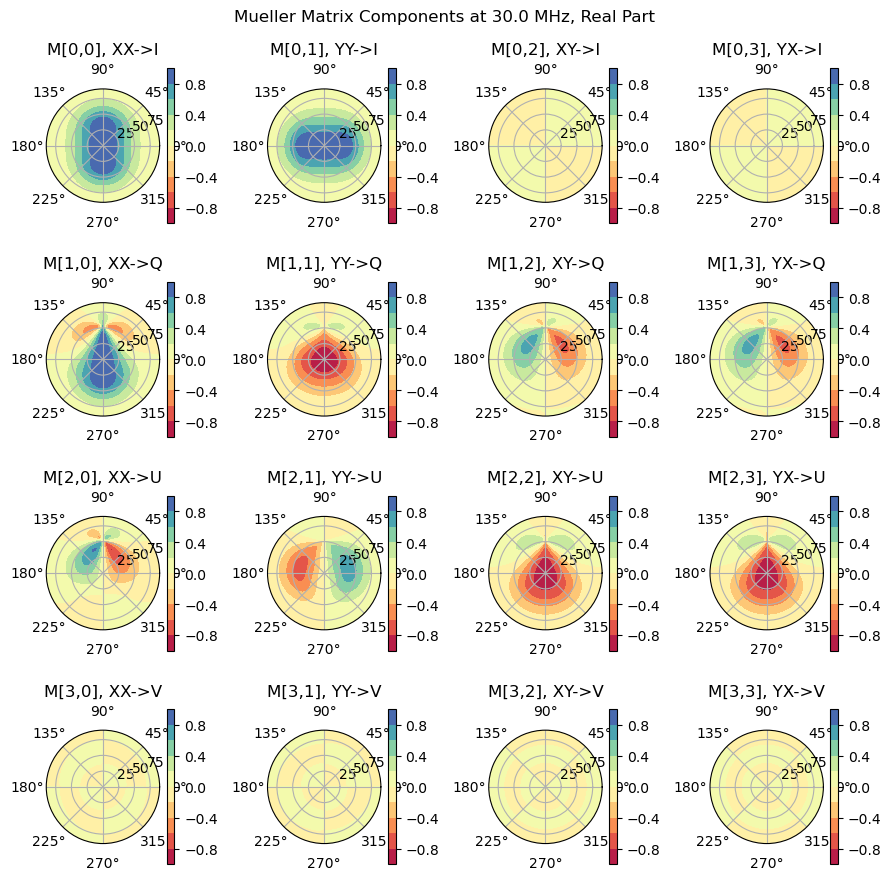

In [7]:
jones_to_mueller.plot_mueller_matrix(
    mueller_mat,
    az_axis,
    za_axis,
    freq_axis[np.newaxis, :],
    plot_freq=30000000,  # Must be included in the freq_axis
    real_part=True,
    vmin=-1,
    vmax=1,
    contour_plot=True,
    stokes=True,
)